<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/TF_6_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 CNN Fashion MNIST

#### module import

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, AvgPool2D, Dropout, Input

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.2
Running on TPU  ['10.102.160.250:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.102.160.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.102.160.250:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [ ]:
def build_model():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)


  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model
with tpu_strategy.scope():
  model_1 = build_model()

model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 30976)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               3965056   
                                                                 
 dense_10 (Dense)            (None, 64)                8256

### 모델 학습
- 런타임 GPU로 설정

In [ ]:
hist_1 = model_1.fit(x_train, y_train,
                 epochs=25,
                 batch_size=128,
                 validation_split=0.3)

Epoch 1/25
329/329 [==============================] - 20s 42ms/step - loss: 0.5119 - acc: 0.8151 - val_loss: 0.3837 - val_acc: 0.8606
Epoch 2/25
329/329 [==============================] - 9s 26ms/step - loss: 0.3415 - acc: 0.8741 - val_loss: 0.3600 - val_acc: 0.8703
Epoch 3/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2873 - acc: 0.8925 - val_loss: 0.3803 - val_acc: 0.8630
Epoch 4/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2429 - acc: 0.9101 - val_loss: 0.3787 - val_acc: 0.8682
Epoch 5/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2036 - acc: 0.9231 - val_loss: 0.4035 - val_acc: 0.8619
Epoch 6/25
329/329 [==============================] - 8s 26ms/step - loss: 0.1756 - acc: 0.9340 - val_loss: 0.4277 - val_acc: 0.8731
Epoch 7/25
329/329 [==============================] - 9s 26ms/step - loss: 0.1531 - acc: 0.9426 - val_loss: 0.4910 - val_acc: 0.8714
Epoch 8/25
329/329 [==============================] - 8s 25ms/step -

### 학습 결과 시각화

In [ ]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

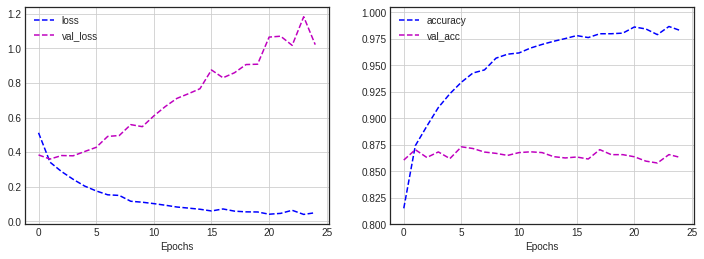

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'm--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'm--', label='val_acc')
plt.xlabel('Epochs')
plt.ylim(0.8, 1.005)
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 9s 22ms/step - loss: 1.0071 - acc: 0.8613


[1.007066011428833, 0.861299991607666]

### 모델 재구성
- 학습 파라미터의 수 비교

In [ ]:
def build_model2():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)


  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

with tpu_strategy.scope():
  model_2 = build_model2()

model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 64)          3692

### 모델 재학습

In [ ]:
hist_2 = model_2.fit(x_train, y_train,
                 epochs=25,
                 batch_size=128,
                 validation_split=0.3)

Epoch 1/25
329/329 [==============================] - 15s 33ms/step - loss: 0.8980 - acc: 0.6737 - val_loss: 0.5487 - val_acc: 0.7968
Epoch 2/25
329/329 [==============================] - 7s 23ms/step - loss: 0.5760 - acc: 0.7936 - val_loss: 0.4771 - val_acc: 0.8238
Epoch 3/25
329/329 [==============================] - 8s 23ms/step - loss: 0.4961 - acc: 0.8247 - val_loss: 0.4239 - val_acc: 0.8412
Epoch 4/25
329/329 [==============================] - 8s 24ms/step - loss: 0.4488 - acc: 0.8411 - val_loss: 0.3965 - val_acc: 0.8547
Epoch 5/25
329/329 [==============================] - 8s 25ms/step - loss: 0.4110 - acc: 0.8541 - val_loss: 0.3789 - val_acc: 0.8586
Epoch 6/25
329/329 [==============================] - 10s 32ms/step - loss: 0.3855 - acc: 0.8619 - val_loss: 0.3856 - val_acc: 0.8524
Epoch 7/25
329/329 [==============================] - 9s 26ms/step - loss: 0.3651 - acc: 0.8692 - val_loss: 0.3594 - val_acc: 0.8673
Epoch 8/25
329/329 [==============================] - 8s 26ms/step 

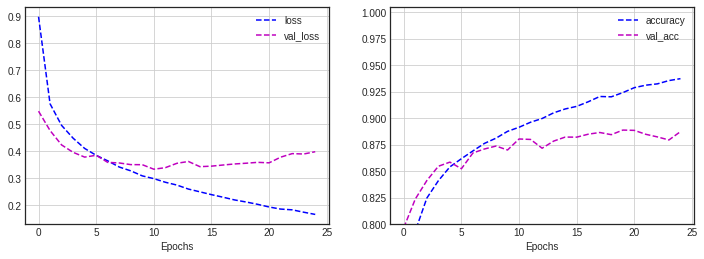

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'm--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'm--', label='val_acc')
plt.xlabel('Epochs')
plt.ylim(0.8, 1.005)
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [ ]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.4120 - acc: 0.8835


[0.41197165846824646, 0.8834999799728394]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [ ]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [ ]:
def build_model3():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=10, activation='softmax')(output)


  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

with tpu_strategy.scope():
  model_3 = build_model3()

model_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_28 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

## 모델 학습 및 결과 시각화

In [ ]:
hist_3 = model_3.fit(x_train, y_train,
                 epochs=25,
                 batch_size=128,
                 validation_split=0.3)

Epoch 1/25
329/329 [==============================] - 20s 42ms/step - loss: 0.8480 - acc: 0.6947 - val_loss: 0.4436 - val_acc: 0.8357
Epoch 2/25
329/329 [==============================] - 8s 25ms/step - loss: 0.4725 - acc: 0.8327 - val_loss: 0.3324 - val_acc: 0.8766
Epoch 3/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3930 - acc: 0.8634 - val_loss: 0.2970 - val_acc: 0.8908
Epoch 4/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3466 - acc: 0.8787 - val_loss: 0.2775 - val_acc: 0.8997
Epoch 5/25
329/329 [==============================] - 9s 26ms/step - loss: 0.3170 - acc: 0.8875 - val_loss: 0.2460 - val_acc: 0.9105
Epoch 6/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2989 - acc: 0.8963 - val_loss: 0.2529 - val_acc: 0.9076
Epoch 7/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2846 - acc: 0.9004 - val_loss: 0.2375 - val_acc: 0.9153
Epoch 8/25
329/329 [==============================] - 8s 26ms/step -

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

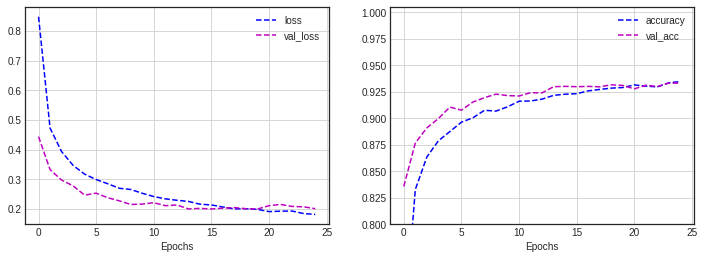

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_3.history['loss'], 'b--', label='loss')
plt.plot(hist_3.history['val_loss'], 'm--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_3.history['acc'], 'b--', label='acc')
plt.plot(hist_3.history['val_acc'], 'm--', label='val_acc')
plt.xlabel('Epochs')
plt.ylim(0.8, 1.005)
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 8s 20ms/step - loss: 0.2127 - acc: 0.9280


[0.21271184086799622, 0.9279999732971191]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.2,
    shear_range=0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size = 200

In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

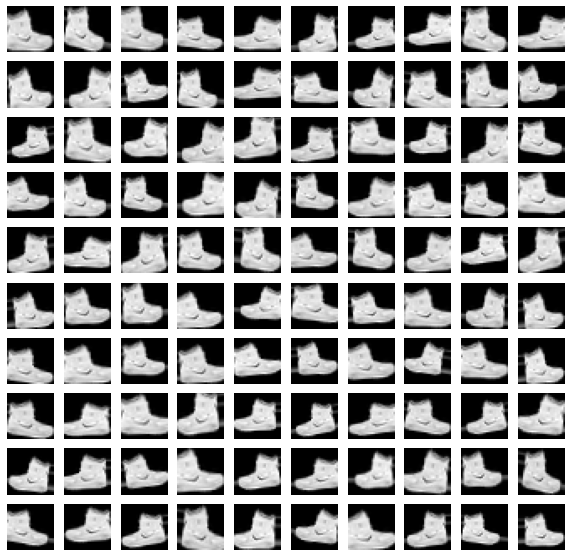

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28), cmap='gray')

데이터 추가

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range = 0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size = 30000

In [ ]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


## 모델 학습 및 결과 시각화

In [ ]:
with tpu_strategy.scope():
  model_4 = build_model3()

model_4.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_32 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 128)       73856     
                                                           

In [ ]:
hist_4 = model_4.fit(x_train, y_train,
                 epochs=25,
                 batch_size=128,
                 validation_split=0.3)

Epoch 1/25
493/493 [==============================] - 24s 34ms/step - loss: 0.8143 - acc: 0.7040 - val_loss: 0.9682 - val_acc: 0.6446
Epoch 2/25
493/493 [==============================] - 12s 25ms/step - loss: 0.4712 - acc: 0.8344 - val_loss: 0.7685 - val_acc: 0.7219
Epoch 3/25
493/493 [==============================] - 14s 28ms/step - loss: 0.3940 - acc: 0.8612 - val_loss: 0.6941 - val_acc: 0.7503
Epoch 4/25
493/493 [==============================] - 12s 24ms/step - loss: 0.3547 - acc: 0.8763 - val_loss: 0.6276 - val_acc: 0.7679
Epoch 5/25
493/493 [==============================] - 12s 25ms/step - loss: 0.3291 - acc: 0.8846 - val_loss: 0.6249 - val_acc: 0.7787
Epoch 6/25
493/493 [==============================] - 12s 24ms/step - loss: 0.3091 - acc: 0.8912 - val_loss: 0.5679 - val_acc: 0.7949
Epoch 7/25
493/493 [==============================] - 12s 24ms/step - loss: 0.2960 - acc: 0.8971 - val_loss: 0.5598 - val_acc: 0.7925
Epoch 8/25
493/493 [==============================] - 12s 24ms

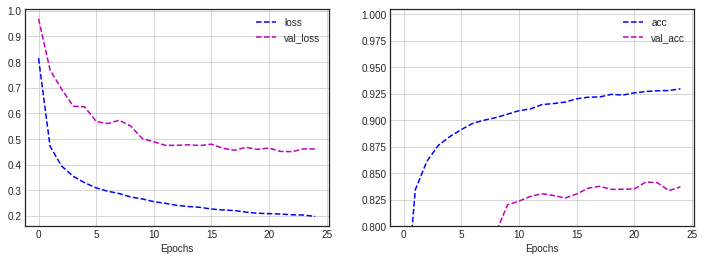

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_4.history['loss'], 'b--', label='loss')
plt.plot(hist_4.history['val_loss'], 'm--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_4.history['acc'], 'b--', label='acc')
plt.plot(hist_4.history['val_acc'], 'm--', label='val_acc')
plt.xlabel('Epochs')
plt.ylim(0.8, 1.005)
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [ ]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 8s 21ms/step - loss: 0.2004 - acc: 0.9296


[0.20043867826461792, 0.9296000003814697]